In [13]:
from PIL import Image
import pytesseract
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import time
import cv2


pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [14]:
test=glob('..\immagini_test_small\*.png')

In [15]:
test

['..\\immagini_test_small\\1101256641910054913.png',
 '..\\immagini_test_small\\1103767176870281216.png',
 '..\\immagini_test_small\\1255030817514041344.png',
 '..\\immagini_test_small\\1255064002935357440.png',
 '..\\immagini_test_small\\1255102526346706945.png',
 '..\\immagini_test_small\\1255187970514132992.png']

In [ ]:
for im in test:
    img1 = np.array(Image.open(im))
    text = pytesseract.image_to_string(img1, lang='ita')
    plt.figure(figsize=(10,10))
    plt.imshow(img1)
    plt.title(text.replace('\n', ''))


# CLEANING DELL'IMMAGINE

Text(0.5, 1.0, 'PLAIN IMAGE')

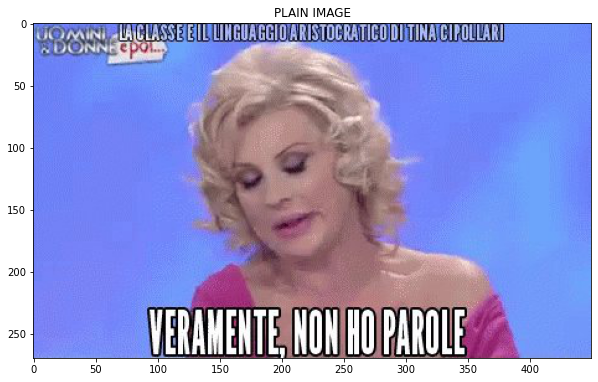

In [16]:
im = np.array(Image.open('..\\immagini_test_small\\1255064002935357440.png'))
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.title('PLAIN IMAGE')

## BILATERAL FILTER

As we noted, the filters we presented earlier tend to blur edges. This is not the case for the bilateral filter, cv2.bilateralFilter(), which was defined for, and is highly effective at noise removal while preserving edges. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the a neighborhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It does not consider whether pixels have almost the same intensity value and does not consider whether the pixel lies on an edge or not. The resulting effect is that Gaussian filters tend to blur edges, which is undesirable.

The bilateral filter also uses a Gaussian filter in the space domain, but it also uses one more (multiplicative) Gaussian filter component which is a function of pixel intensity differences. The Gaussian function of space makes sure that only pixels are ‘spatial neighbors’ are considered for filtering, while the Gaussian component applied in the intensity domain (a Gaussian function of intensity differences) ensures that only those pixels with intensities similar to that of the central pixel (‘intensity neighbors’) are included to compute the blurred intensity value. As a result, this method preserves edges, since for pixels lying near edges, neighboring pixels placed on the other side of the edge, and therefore exhibiting large intensity variations when compared to the central pixel, will not be included for blurring.

Text(0.5, 1.0, 'BILATERAL FILTER')

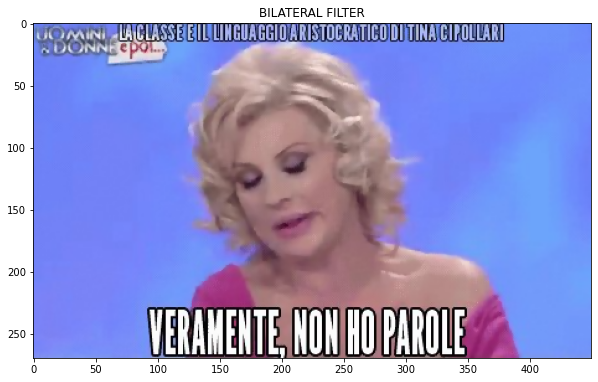

In [17]:
im= cv2.bilateralFilter(im,5, 55,60)
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.title('BILATERAL FILTER')

# SPOSTARE DA RGB A SCALA DI GRIGI

cv2.cvtColor() is a library of Python bindings designed to solve computer vision problems. cv2.cvtColor() method is used to convert an image from one color space to another. There are more than 150 color-space conversion methods available in OpenCV. We will use some of color space conversion codes below.

Text(0.5, 1.0, 'IMMAGINE IN GREYS')

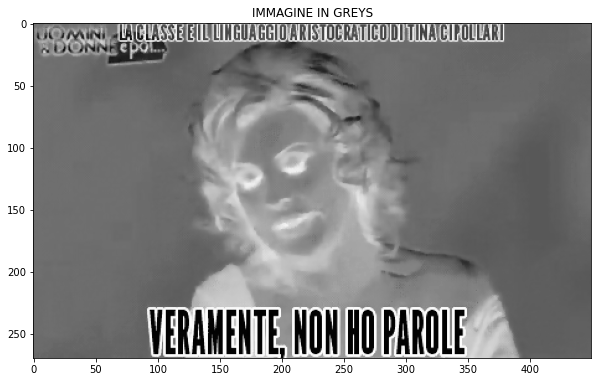

In [18]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='Greys')
plt.title('IMMAGINE IN GREYS')

## BINARIZZARE

Here, the matter is straight-forward. For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. The function cv.threshold is used to apply the thresholding. The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold. OpenCV provides different types of thresholding which is given by the fourth parameter of the function. Basic thresholding as described above is done by using the type cv.THRESH_BINARY. All simple thresholding types are:

cv.THRESH_BINARY
cv.THRESH_BINARY_INV
cv.THRESH_TRUNC
cv.THRESH_TOZERO
cv.THRESH_TOZERO_INV
See the documentation of the types for the differences.

The method returns two outputs. The first is the threshold that was used and the second output is the thresholded image.

Text(0.5, 1.0, 'IMMAGINE BINARIA')

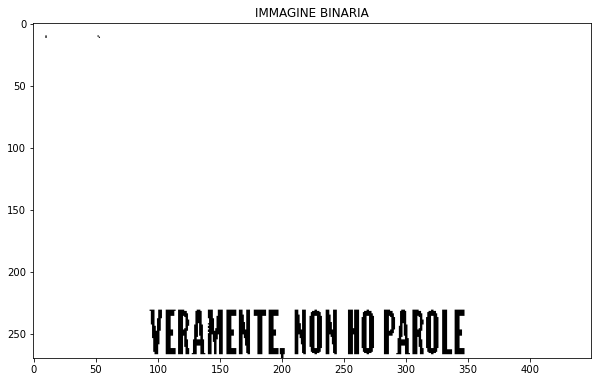

In [19]:
_, im = cv2.threshold(im, 240, 255, 1)
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='gray')
plt.title('IMMAGINE BINARIA')

In [20]:
def preprocess_finale(im):
    im= cv2.bilateralFilter(im,5, 55,60)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    _, im = cv2.threshold(im, 240, 255, 1)
    return im

## CONFIGURARE IL TESSERACT IN MODO OTTIMALE

psm (Page segmentation modes):

6    Assume a single uniform block of text. 

...

__11    Sparse text. Find as much text as possible in no particular order.__

...


12    Sparse text with OSD.

__SET A WHITELIST per escludere roba sporca che pesca in mezzo all'immagine__


In [ ]:
u = 'È'
print(u)

In [ ]:
u.encode('iso-8859-1')

In [ ]:
print(b'\xc3\x88'.decode('utf-8'))

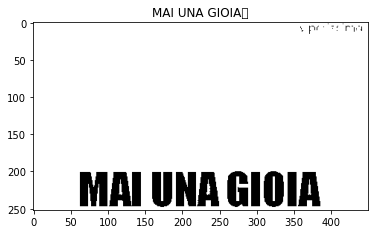

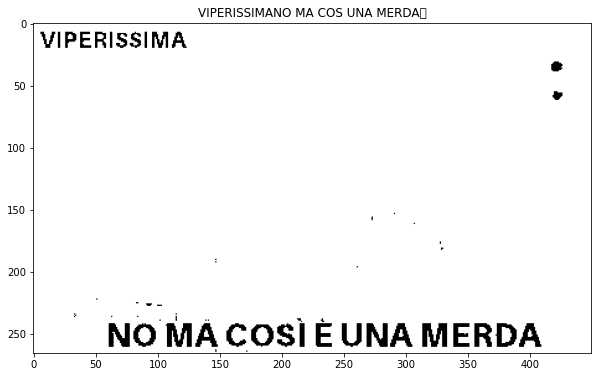

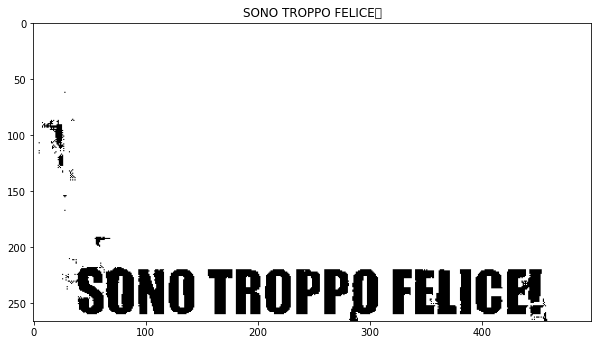

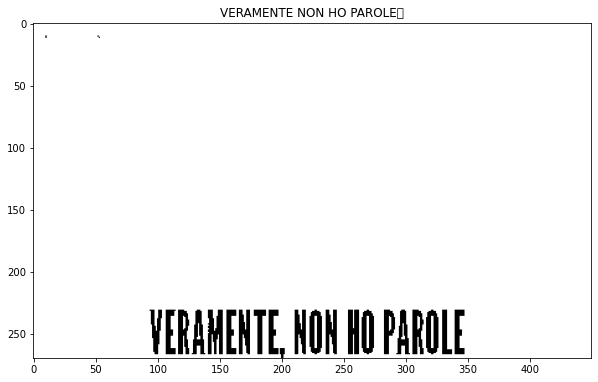

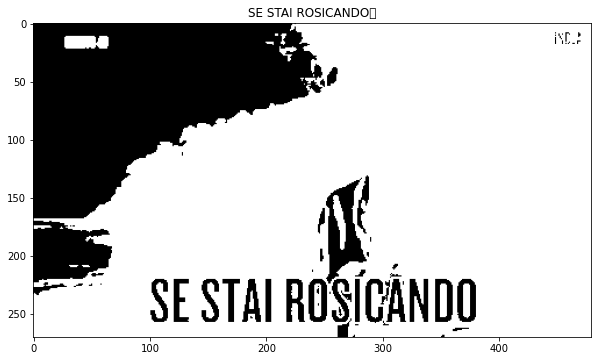

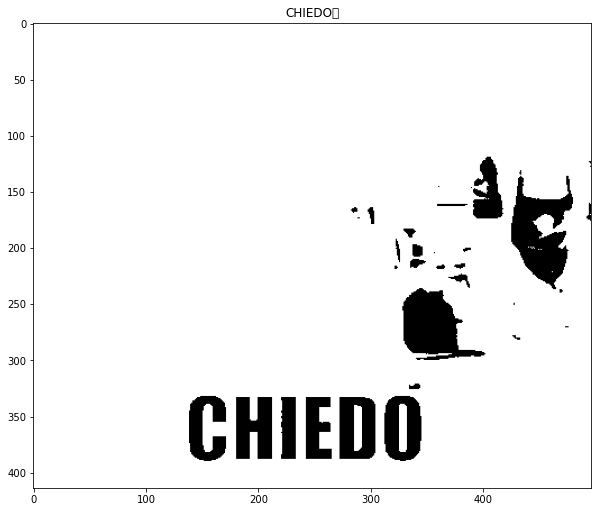

<Figure size 720x720 with 0 Axes>

In [21]:

custom_config = r"--oem 3 --psm 11 -c tessedit_char_whitelist='ABCDEFGHIJKLMNOPQRSTUVWXYZ '"

for im in test:
    img1 = preprocess_finale(np.array(Image.open(im)))
    text = pytesseract.image_to_string(img1, lang='ita', config=custom_config)
    plt.imshow(img1, cmap='gray')
    plt.title(text.replace('\n', ''))
    plt.figure(figsize=(10,10))

# GOAL LINE:

In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time
import operator


endpoint='**'
subscription_key='**'
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

def recognize_text(img):
    '''
    Batch Read File, recognize handwritten text - remote
    This example will extract handwritten text in an image, then print results, line by line.
    This API call can also recognize handwriting (not shown).
    '''
    print("===== Batch Read File - remote =====")
    # Get an image with handwritten text
    img=open(im, "rb")
    # Call API with URL and raw response (allows you to get the operation location)
    recognize_handw_results = computervision_client.read_in_stream(img, raw=True)

    # Get the operation location (URL with an ID at the end) from the response
    operation_location_remote = recognize_handw_results.headers["Operation-Location"]
    # Grab the ID from the URL
    operation_id = operation_location_remote.split("/")[-1]

    # Call the "GET" API and wait for it to retrieve the results 
    while True:
        get_handw_text_results = computervision_client.get_read_result(operation_id)
        if get_handw_text_results.status not in ['notStarted', 'running']:
            break
        time.sleep(1)

    # Print the detected text, line by line
    text=''
    if get_handw_text_results.status == OperationStatusCodes.succeeded:
        for text_result in get_handw_text_results.analyze_result.read_results:
            for line in text_result.lines:
                text+=line.text
    return(text)

In [ ]:
for im in test:
    img1 = open(im, "rb").read()
    text = recognize_text(img1)
    img2 = np.array(Image.open(im))
    plt.imshow(img2, cmap='binary')
    plt.title(text)
    plt.figure(figsize=(10,10))